
### Analyzing Consumer Trends and Fraud Detection in large-Scale Transactions
"""

  Hanok Tamang  | 2358903 | h.tamang@wlv.ac.uk 

  Mayank Baryal | 2358903 | m.baryal@wlv.ac.uk
  
"""

### 1. Data Import

In [9]:
# imported the excel files 

import pandas as pd

file2 = "DATASET/apr-jun-2018-3rd-qtr-gsa-pc-transactions.xlsx"
file1 = "DATASET/jan-march-2018-gsa-pc-transactions.xlsx"
file3 = "DATASET/jul-sep-2018-gsa-pc-transactions.xlsx"

# Load the first sheet from each Excel file
xls1 = pd.ExcelFile(file1)
xls2 = pd.ExcelFile(file2)
xls3 = pd.ExcelFile(file3)
# Checking sheet names
sheets1 = xls1.sheet_names
sheets2 = xls2.sheet_names
sheets3 = xls3.sheet_names

print(sheets1,sheets2, sheets3)

# Load first sheet from each file
df1 = xls1.parse(sheets1[0])
df2 = xls2.parse(sheets2[0])
df3 = xls3.parse(sheets3[0])

# Display column names and first few rows from each dataset
df1_info = {"columns": df1.columns.tolist()}
df2_info = {"columns": df2.columns.tolist()}
df3_info = {"columns": df3.columns.tolist()}

print(len(df1_info["columns"]))
print(len(df2_info["columns"]))
print(len(df3_info["columns"]))

df1_info, df2_info, df3_info

['Transaction Report - OPEN DATA '] ['APR JUN 2018 3rd Qtr'] ['Sheet1', 'Sheet2', 'Sheet3']
18
20
18


({'columns': ['Program',
   'Region',
   'Hierarchy Level 3 Name',
   'Cardholder First Name',
   'Cardholder Last Name',
   'Merchant Name',
   'Merchant Property Address',
   'Merchant City',
   'Merchant State',
   'Merchant Zip',
   'Merchant Phone',
   'MCC',
   'MCC Description',
   'Transaction Date',
   'Transaction Post Date',
   'Transaction Amount',
   'Transaction Type',
   'Transaction DB-CR Indicator']},
 {'columns': ['Hierarchy Level 1 Name',
   'Hierarchy Level 2 Name',
   'Hierarchy Level 3',
   'Hierarchy Level 3 Name',
   'Account Name (Short)',
   'Cardholder First Name',
   'Cardholder Last Name',
   'Merchant Name',
   'Merchant Property Address',
   'Merchant City',
   'Merchant State',
   'Merchant Zip',
   'Merchant Phone',
   'MCC',
   'MCC Description',
   'Transaction Date',
   'Transaction Post Date',
   'Transaction Amount',
   'Transaction Type',
   'Transaction DB-CR Indicator']},
 {'columns': ['Program',
   'Region',
   'Service/Staff Office',
   'Cardh

### 2. Data Cleaning

In [13]:
# renaming the column name of second excel file

df2_new = df2.rename(columns = {
    'Hierarchy Level 1 Name': 'Program',
    'Hierarchy Level 2 Name': 'Region',
    'Hierarchy Level 3 Name': 'Hierarchy Level 3 Name',
    'Cardholder First Name': 'Cardholder First Name',
    'Cardholder Last Name': 'Cardholder Last Name',
    'Merchant Name': 'Merchant Name',
    'Merchant Property Address': 'Merchant Property Address',
    'Merchant City': 'Merchant City',
    'Merchant State': 'Merchant State',
    'Merchant Zip': 'Merchant Zip',
    'Merchant Phone': 'Merchant Phone',
    'MCC': 'MCC',
    'MCC Description': 'MCC Description',
    'Transaction Date': 'Transaction Date',
    'Transaction Post Date': 'Transaction Post Date',
    'Transaction Amount': 'Transaction Amount',
    'Transaction Type': 'Transaction Type',
    'Transaction DB-CR Indicator': 'Transaction DB-CR Indicator'
})

# dropping unnecessary columns
df2_new = df2_new.drop(['Hierarchy Level 3','Account Name (Short)'], axis = 1)
print(df2_new.columns.tolist())
len(df2_new.columns)

['Program', 'Region', 'Hierarchy Level 3 Name', 'Cardholder First Name', 'Cardholder Last Name', 'Merchant Name', 'Merchant Property Address', 'Merchant City', 'Merchant State', 'Merchant Zip', 'Merchant Phone', 'MCC', 'MCC Description', 'Transaction Date', 'Transaction Post Date', 'Transaction Amount', 'Transaction Type', 'Transaction DB-CR Indicator']


18

In [19]:
# renaming the column name of third excel file

df3_new = df3.rename(columns = {
    'Service/Staff Office': 'Hierarchy Level 3 Name'
})

print(df3_new.columns.tolist())
len(df3_new.columns)  

['Program', 'Region', 'Hierarchy Level 3 Name', 'Cardholder First Name', 'Cardholder Last Name', 'Merchant Name', 'Merchant Property Address', 'Merchant City', 'Merchant State', 'Merchant Zip', 'Merchant Phone', 'MCC', 'MCC Description', 'Transaction Date', 'Transaction Post Date', 'Transaction Amount', 'Transaction Type', 'Transaction DB-CR Indicator']


18

In [21]:
# standarized the columns names.

def standarized_col_names(df):
    df.columns = df.columns.str.strip().str.lower()
    return df
    
df1_standard = standarized_col_names(df1)
df2_standard = standarized_col_names(df2_new)
df3_standard = standarized_col_names(df3_new)

df1_standard.info()
print(df1_standard.isnull().sum())
print(df2_standard.isnull().sum())
print(df3_standard.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8096 entries, 0 to 8095
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   program                      8096 non-null   object        
 1   region                       8096 non-null   object        
 2   hierarchy level 3 name       8096 non-null   object        
 3   cardholder first name        8091 non-null   object        
 4   cardholder last name         8096 non-null   object        
 5   merchant name                8096 non-null   object        
 6   merchant property address    7955 non-null   object        
 7   merchant city                8096 non-null   object        
 8   merchant state               8068 non-null   object        
 9   merchant zip                 8096 non-null   int64         
 10  merchant phone               5936 non-null   object        
 11  mcc                          8096 non-null 

In [23]:
# dropping unncessary columns 

df1_standard.drop(['merchant phone', 'merchant property address', 'merchant city'],axis = 1, inplace = True)
df2_standard.drop(['merchant phone', 'merchant property address', 'merchant city'],axis = 1, inplace = True)
df3_standard.drop(['merchant phone', 'merchant property address', 'merchant city'],axis = 1, inplace = True)
print("First dataframe:\n")
print(df1_standard.isnull().sum())
print("\nSecond dataframe:\n")
print(df2_standard.isnull().sum())
print("\nThirddataframe:\n")
print(df3_standard.isnull().sum())

First dataframe:

program                         0
region                          0
hierarchy level 3 name          0
cardholder first name           5
cardholder last name            0
merchant name                   0
merchant state                 28
merchant zip                    0
mcc                             0
mcc description                 0
transaction date                0
transaction post date           0
transaction amount              0
transaction type                0
transaction db-cr indicator     0
dtype: int64

Second dataframe:

program                         0
region                          0
hierarchy level 3 name          0
cardholder first name           2
cardholder last name            0
merchant name                   0
merchant state                 35
merchant zip                    0
mcc                             0
mcc description                 0
transaction date                0
transaction post date           0
transaction amount             

In [25]:
# row and column data

print(df1_standard.shape)
print(df2_standard.shape)
print(df3_standard.shape)

(8096, 15)
(8707, 15)
(10526, 15)


In [27]:
# dropping and checking null values

df1_cleaned = df1_standard.dropna()
print(df1_cleaned.isnull().sum())
df1_cleaned.shape

program                        0
region                         0
hierarchy level 3 name         0
cardholder first name          0
cardholder last name           0
merchant name                  0
merchant state                 0
merchant zip                   0
mcc                            0
mcc description                0
transaction date               0
transaction post date          0
transaction amount             0
transaction type               0
transaction db-cr indicator    0
dtype: int64


(8063, 15)

In [29]:
# dropping and checking null values

df2_cleaned = df2_standard.dropna()
print(df2_cleaned.isnull().sum())
df2_cleaned.shape

program                        0
region                         0
hierarchy level 3 name         0
cardholder first name          0
cardholder last name           0
merchant name                  0
merchant state                 0
merchant zip                   0
mcc                            0
mcc description                0
transaction date               0
transaction post date          0
transaction amount             0
transaction type               0
transaction db-cr indicator    0
dtype: int64


(8670, 15)

In [31]:
# dropping and checking null values

df3_cleaned = df3_standard.dropna()
print(df3_cleaned.isnull().sum())
df3_cleaned.shape

program                        0
region                         0
hierarchy level 3 name         0
cardholder first name          0
cardholder last name           0
merchant name                  0
merchant state                 0
merchant zip                   0
mcc                            0
mcc description                0
transaction date               0
transaction post date          0
transaction amount             0
transaction type               0
transaction db-cr indicator    0
dtype: int64


(10504, 15)

In [33]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8063 entries, 0 to 8095
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   program                      8063 non-null   object        
 1   region                       8063 non-null   object        
 2   hierarchy level 3 name       8063 non-null   object        
 3   cardholder first name        8063 non-null   object        
 4   cardholder last name         8063 non-null   object        
 5   merchant name                8063 non-null   object        
 6   merchant state               8063 non-null   object        
 7   merchant zip                 8063 non-null   int64         
 8   mcc                          8063 non-null   int64         
 9   mcc description              8063 non-null   object        
 10  transaction date             8063 non-null   datetime64[ns]
 11  transaction post date        8063 non-null   dat

In [35]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8670 entries, 0 to 8706
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   program                      8670 non-null   object        
 1   region                       8670 non-null   object        
 2   hierarchy level 3 name       8670 non-null   object        
 3   cardholder first name        8670 non-null   object        
 4   cardholder last name         8670 non-null   object        
 5   merchant name                8670 non-null   object        
 6   merchant state               8670 non-null   object        
 7   merchant zip                 8670 non-null   int64         
 8   mcc                          8670 non-null   int64         
 9   mcc description              8670 non-null   object        
 10  transaction date             8670 non-null   datetime64[ns]
 11  transaction post date        8670 non-null   dat

In [37]:
df3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10504 entries, 0 to 10524
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   program                      10504 non-null  object        
 1   region                       10504 non-null  object        
 2   hierarchy level 3 name       10504 non-null  object        
 3   cardholder first name        10504 non-null  object        
 4   cardholder last name         10504 non-null  object        
 5   merchant name                10504 non-null  object        
 6   merchant state               10504 non-null  object        
 7   merchant zip                 10504 non-null  float64       
 8   mcc                          10504 non-null  float64       
 9   mcc description              10504 non-null  object        
 10  transaction date             10504 non-null  datetime64[ns]
 11  transaction post date        10504 non-null  d

In [39]:
# standardizing the dates

for df in [df1_cleaned, df2_cleaned, df3_cleaned]:
    df.loc[:, 'transaction date'] = df['transaction date'].dt.strftime('%Y-%m-%d')
    df.loc[:, 'transaction post date'] = df['transaction post date'].dt.strftime('%Y-%m-%d')

df1_cleaned.to_csv('DATASET/cleaned_jan.csv', index=False)
df2_cleaned.to_csv('DATASET/cleaned_april.csv', index=False)
df3_cleaned.to_csv('DATASET/cleaned_jul.csv', index=False)

In [41]:
# merging 3 excel file into one

merged_df = pd.concat([df1_cleaned, df2_cleaned, df3_cleaned])
merged_df.shape
merged_df.to_csv('DATASET/merged_data.csv', index = False)

In [43]:
# final check for null values

merged_df.isnull().sum()

program                        0
region                         0
hierarchy level 3 name         0
cardholder first name          0
cardholder last name           0
merchant name                  0
merchant state                 0
merchant zip                   0
mcc                            0
mcc description                0
transaction date               0
transaction post date          0
transaction amount             0
transaction type               0
transaction db-cr indicator    0
dtype: int64

In [45]:
# row and column after merged

merged_df.shape

(27237, 15)

In [47]:
merged_df.describe()

,merchant zip,mcc,transaction date,transaction post date,transaction amount
count,2.723700e+04,27237.000000,27237,27237,27237.000000
mean,4.708468e+08,5924.270955,2018-05-24 20:49:18.035025664,2018-05-26 12:58:45.850864384,808.986330
min,0.000000e+00,763.000000,2017-11-28 00:00:00,2018-01-02 00:00:00,-20534.940000
25%,2.019000e+08,5021.000000,2018-03-16 00:00:00,2018-03-19 00:00:00,120.000000
50%,3.811600e+08,5943.000000,2018-05-24 00:00:00,2018-05-28 00:00:00,400.000000
75%,7.861300e+08,7399.000000,2018-08-07 00:00:00,2018-08-09 00:00:00,1175.000000
max,9.990100e+08,9402.000000,2018-09-28 00:00:00,2018-09-28 00:00:00,28051.000000
std,3.200342e+08,2174.690041,NaN,NaN,1199.137713


### 3. Data Visualisation

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

# Load the dataset
data = pd.read_csv('DATASET/merged_data.csv')


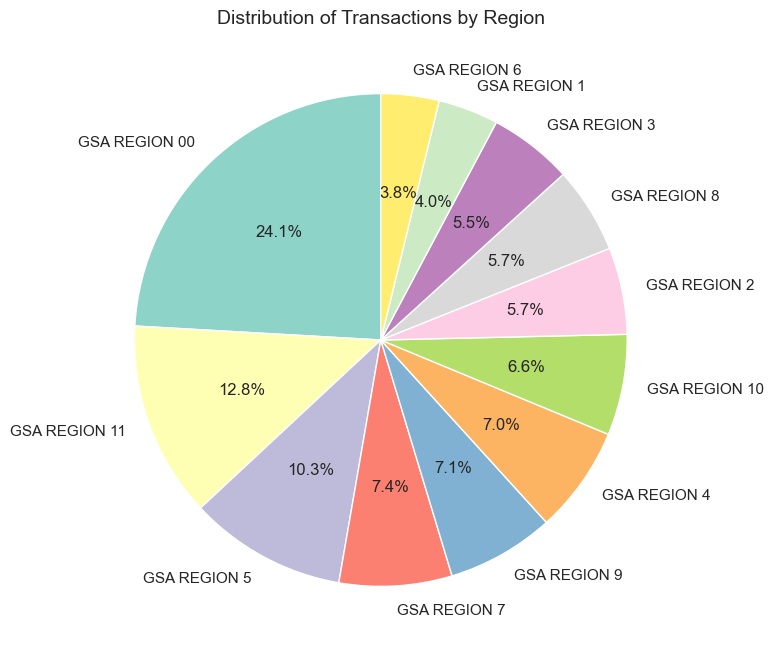

In [127]:
# 2. Pie Chart of Transactions by Region
region_counts = data['region'].value_counts()
plt.figure(figsize=(8, 8))
region_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3', n_colors=len(region_counts)), startangle=90)
plt.title('Distribution of Transactions by Region', fontsize=14)
plt.ylabel('')
plt.show()

/var/folders/fb/vfmf6q_j48l_5lwxbkzcxng80000gp/T/ipykernel_6093/1109620155.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transaction type', data=data, palette='Set2')


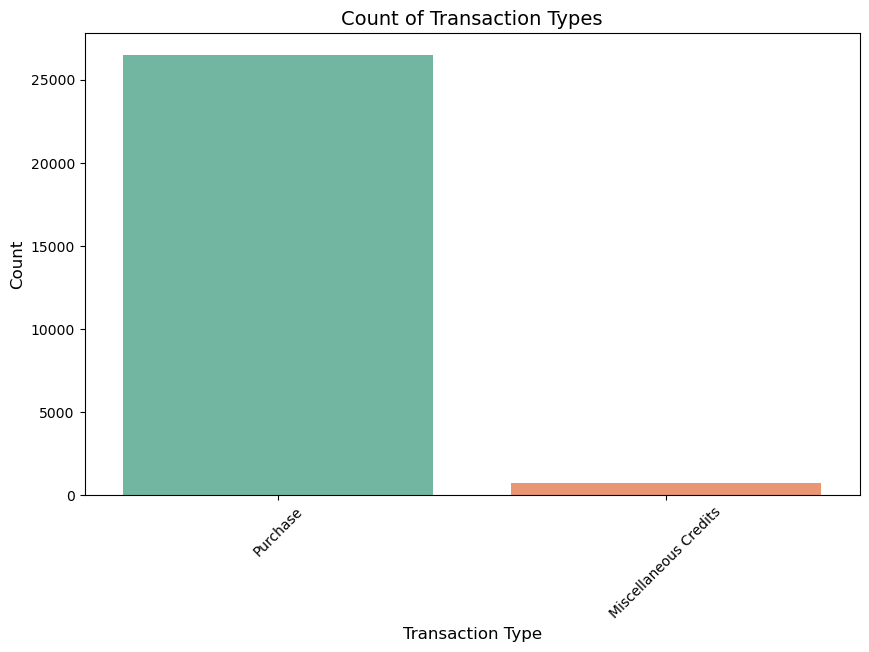

In [94]:
# ---------------------------
# 2. Transaction Type Counts
plt.figure(figsize=(10, 6))
sns.countplot(x='transaction type', data=data, palette='Set2')
plt.title('Count of Transaction Types', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()




/var/folders/fb/vfmf6q_j48l_5lwxbkzcxng80000gp/T/ipykernel_6093/2168888495.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mcc.index, y=top_mcc.values, palette='viridis')


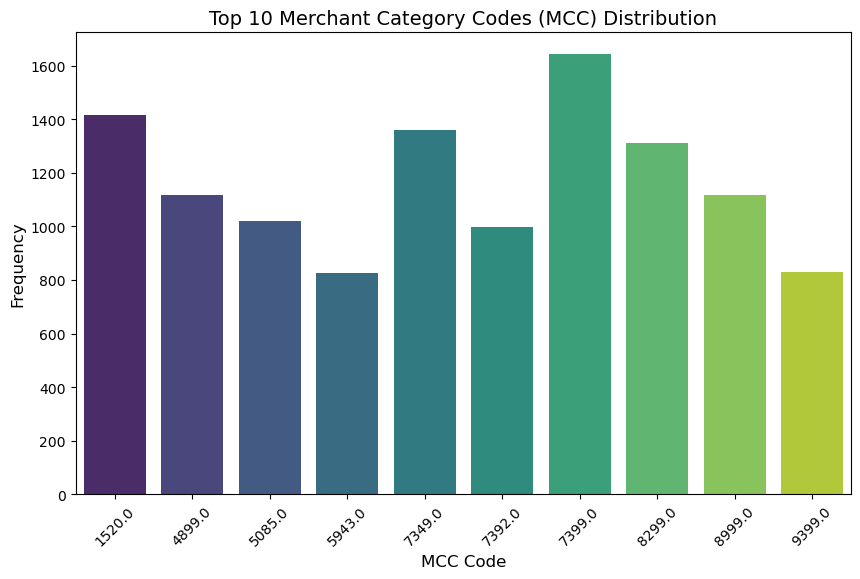

In [96]:

# ---------------------------
# 5. Merchant Category Code (MCC) Distribution (Top 10)
top_mcc = data['mcc'].value_counts().head(10)  # Get top 10 most frequent MCC codes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_mcc.index, y=top_mcc.values, palette='viridis')
plt.title('Top 10 Merchant Category Codes (MCC) Distribution', fontsize=14)
plt.xlabel('MCC Code', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()



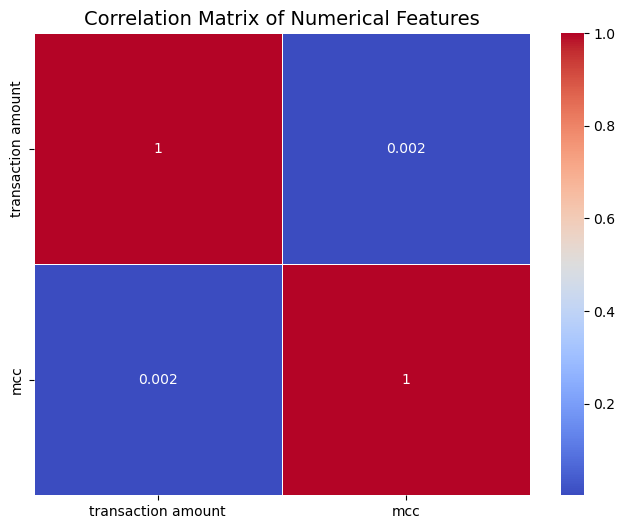

In [98]:
# ---------------------------
# 6. Correlation Matrix of Numerical Features
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.show()

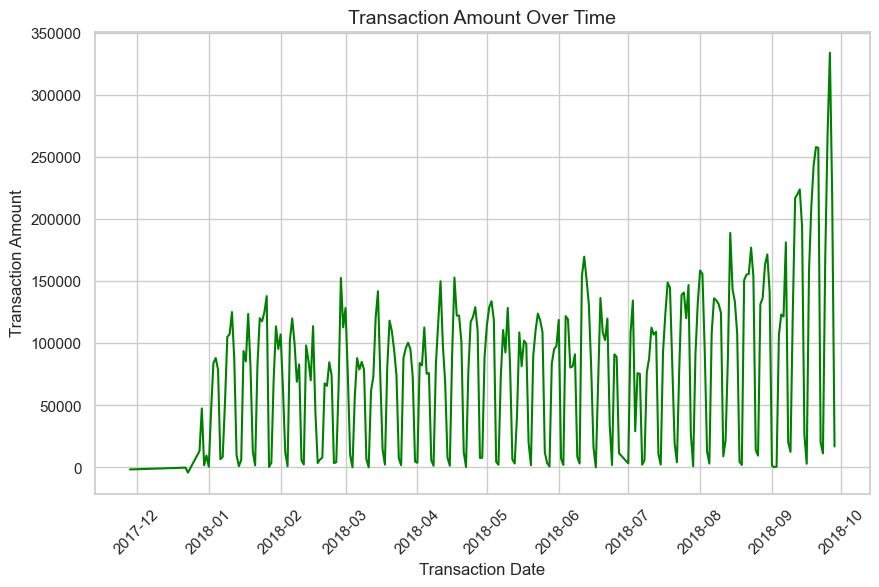

In [104]:

# ---------------------------
# 6. Transaction Amount Over Time (if date is present)
if 'transaction date' in data.columns:
    # Convert 'transaction date' to datetime
    data['transaction date'] = pd.to_datetime(data['transaction date'])
    
    # Aggregate transaction amount by date
    transaction_over_time = data.groupby('transaction date')['transaction amount'].sum().reset_index()

    plt.figure(figsize=(10, 6))
    plt.plot(transaction_over_time['transaction date'], transaction_over_time['transaction amount'], color='green')
    plt.title('Transaction Amount Over Time', fontsize=14)
    plt.xlabel('Transaction Date', fontsize=12)
    plt.ylabel('Transaction Amount', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

/var/folders/fb/vfmf6q_j48l_5lwxbkzcxng80000gp/T/ipykernel_6093/3941680203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='transaction amount', data=data, palette='coolwarm')


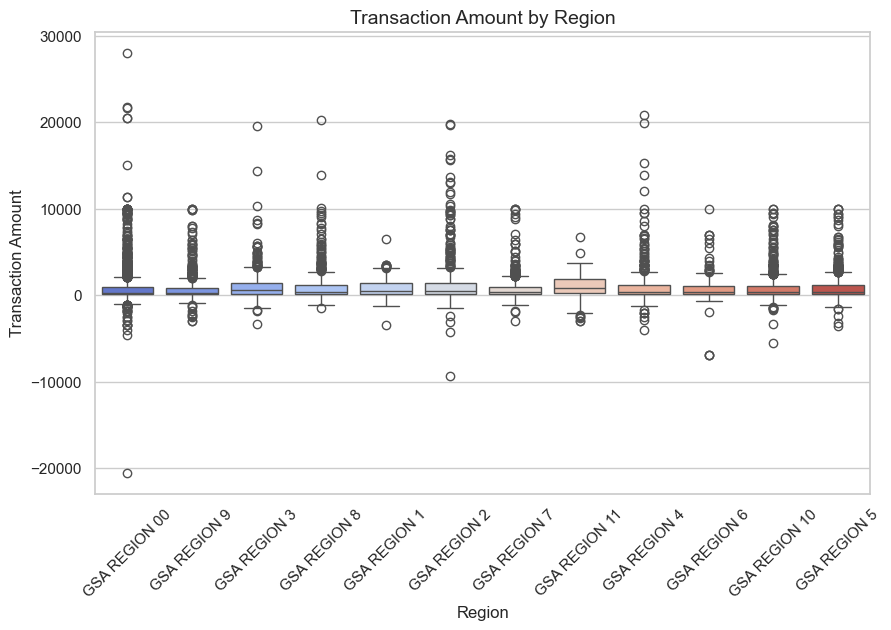

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='transaction amount', data=data, palette='coolwarm')
plt.title('Transaction Amount by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()

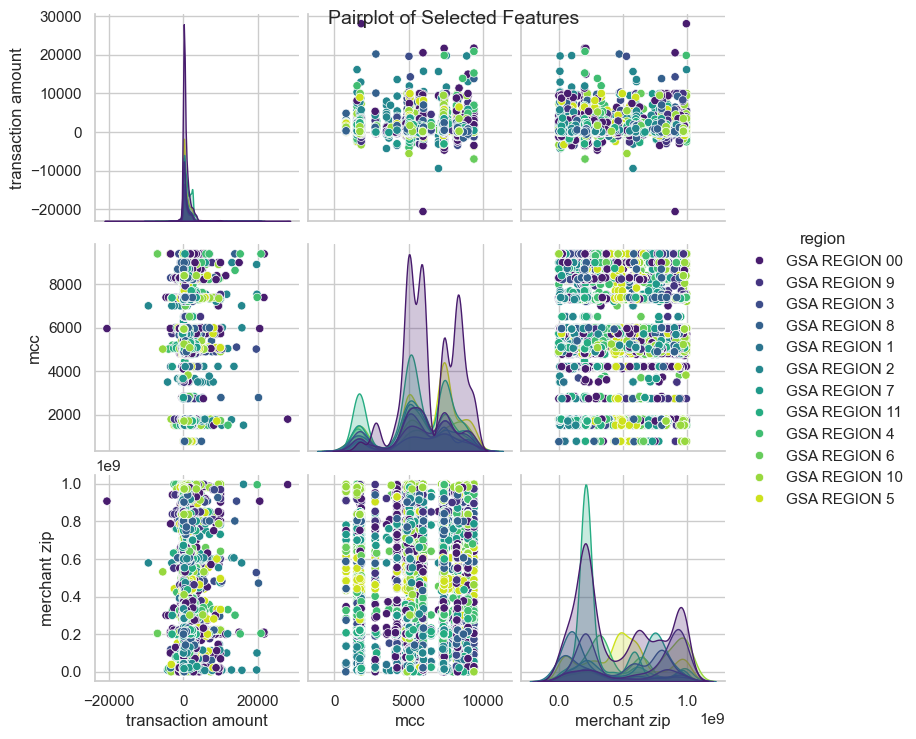

In [110]:
selected_features = ['transaction amount', 'mcc', 'merchant zip', 'region']  # Select features for pairplot
sns.pairplot(data[selected_features], hue='region', palette='viridis')
plt.suptitle('Pairplot of Selected Features', fontsize=14)
plt.show()

/var/folders/fb/vfmf6q_j48l_5lwxbkzcxng80000gp/T/ipykernel_6093/97802890.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='region', y='transaction amount', data=data, palette='coolwarm')


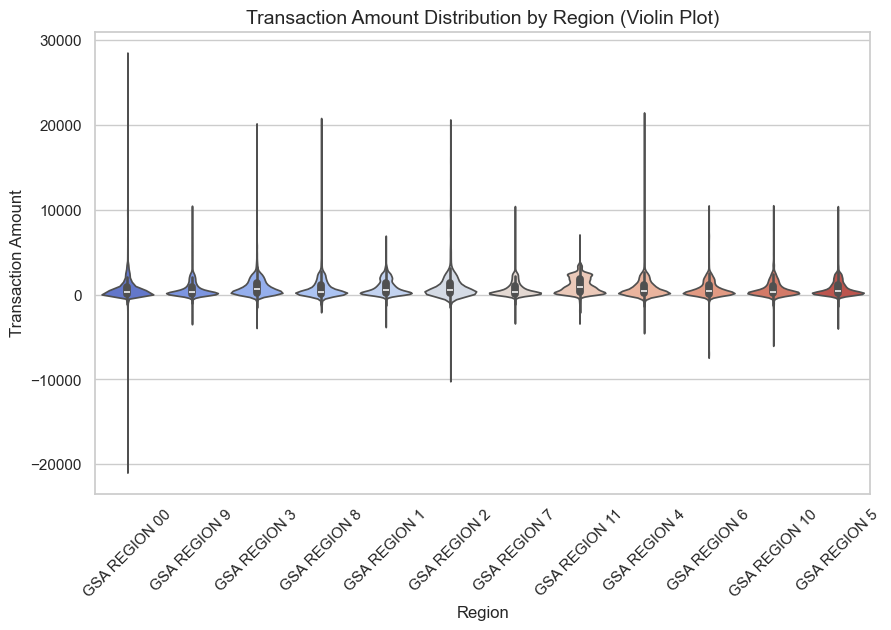

In [118]:
# 8. Violin Plot of Transaction Amount by Region
plt.figure(figsize=(10, 6))
sns.violinplot(x='region', y='transaction amount', data=data, palette='coolwarm')
plt.title('Transaction Amount Distribution by Region (Violin Plot)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()


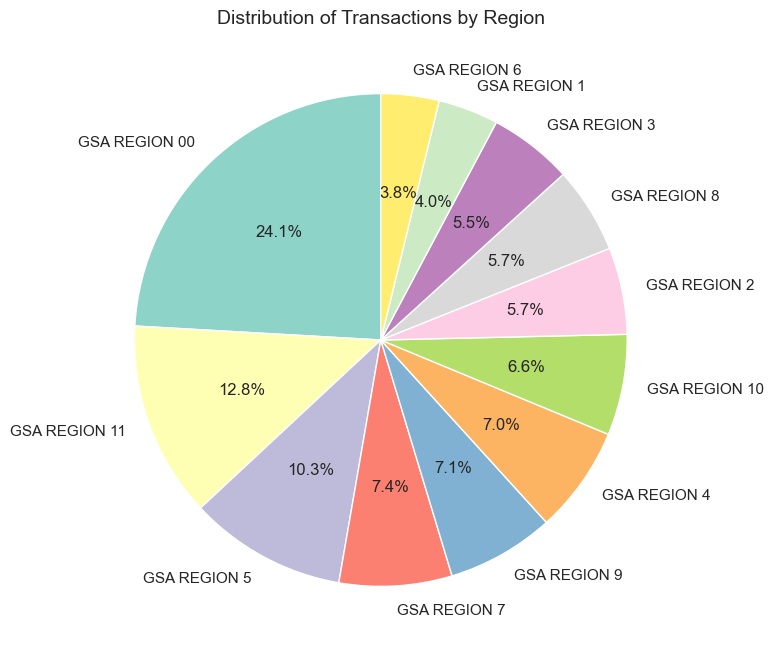

### 4. Model Building

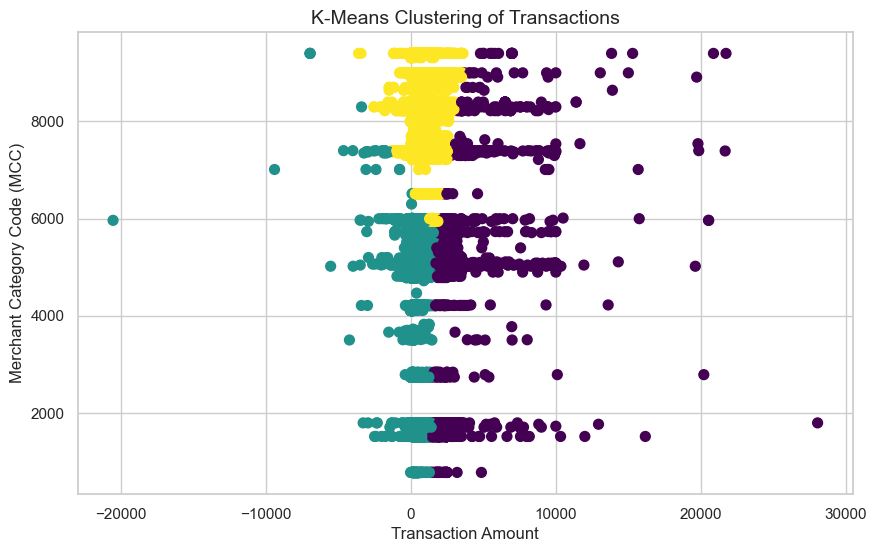

Cluster Sizes: kmeans_cluster
1    13456
2    10986
0     2795
Name: count, dtype: int64


In [131]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('DATASET/merged_data.csv')

# Select numerical features for clustering (e.g., transaction amount, MCC)
numerical_columns = ['transaction amount', 'mcc']
data_scaled = StandardScaler().fit_transform(data[numerical_columns])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['transaction amount'], data['mcc'], c=data['kmeans_cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering of Transactions', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Merchant Category Code (MCC)', fontsize=12)
plt.show()

# Checking the size of each cluster
cluster_sizes = data['kmeans_cluster'].value_counts()
print("Cluster Sizes:", cluster_sizes)


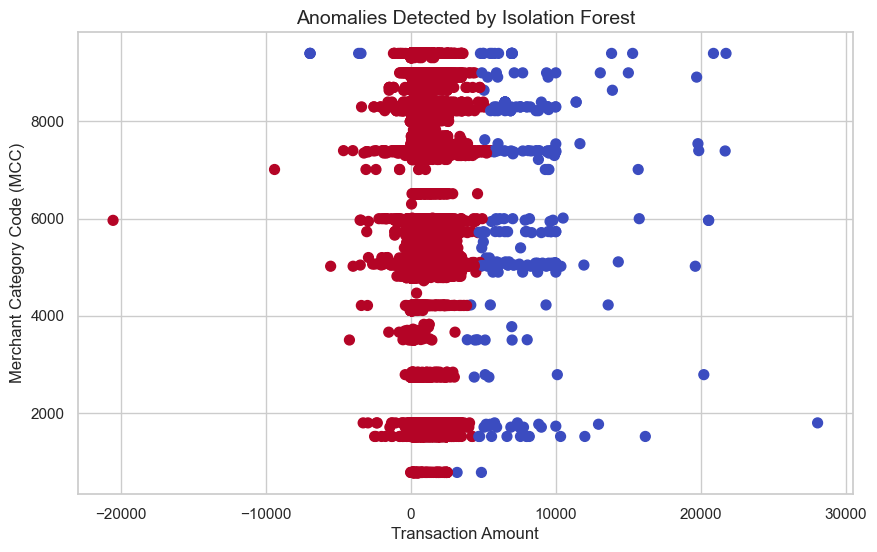

Anomaly Counts: anomaly
 1    26964
-1      273
Name: count, dtype: int64


In [133]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # You can adjust contamination rate
data['anomaly'] = iso_forest.fit_predict(data_scaled)

# Visualize the anomalies detected by Isolation Forest
plt.figure(figsize=(10, 6))
plt.scatter(data['transaction amount'], data['mcc'], c=data['anomaly'], cmap='coolwarm', s=50)
plt.title('Anomalies Detected by Isolation Forest', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Merchant Category Code (MCC)', fontsize=12)
plt.show()

# Check how many anomalies were detected
anomaly_counts = data['anomaly'].value_counts()
print("Anomaly Counts:", anomaly_counts)


Epoch 1/10


/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0103 - val_loss: 0.0011
Epoch 2/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 5.3332e-04 - val_loss: 0.0010
Epoch 3/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 5.7200e-04 - val_loss: 0.0010
Epoch 4/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 5.7662e-04 - val_loss: 0.0010
Epoch 5/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 5.4194e-04 - val_loss: 0.0011
Epoch 6/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 5.7434e-04 - val_loss: 0.0011
Epoch 7/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 5.4249e-04 - val_loss: 0.0011
Epoch 8/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 5.6499e-04 - val_loss: 9.8630e-04
Epoch 9/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 5.1330e-04 - val_loss: 9.9180e-04
Epoch 10/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 5.5473e-04 - val_loss: 0.0011
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


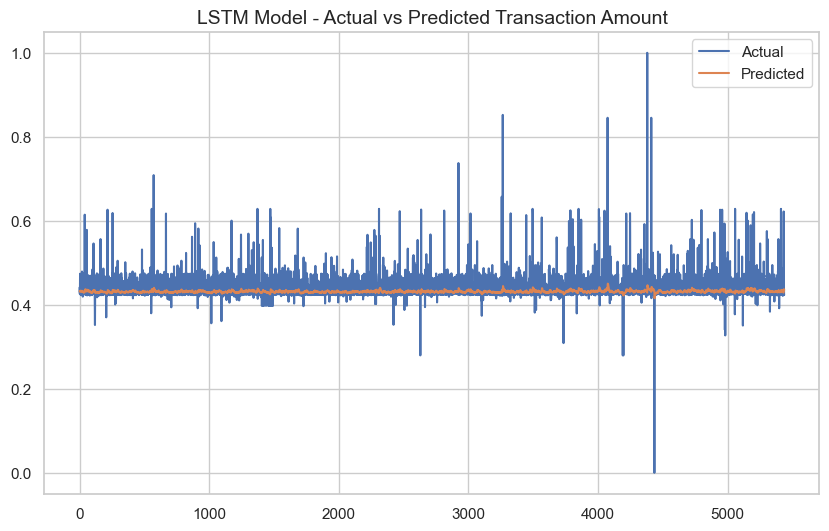

In [136]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Preprocessing Data for LSTM
data['transaction date'] = pd.to_datetime(data['transaction date'])
data = data.sort_values('transaction date')

# Min-Max scaling of transaction amount
scaler = MinMaxScaler(feature_range=(0, 1))
data['scaled_amount'] = scaler.fit_transform(data[['transaction amount']])

# Create sequences of data for LSTM
sequence_length = 50  # The length of the sequences for LSTM
X = []
y = []

# Use the transaction amount to create sequences
for i in range(sequence_length, len(data)):
    X.append(data['scaled_amount'].iloc[i-sequence_length:i].values)
    y.append(data['scaled_amount'].iloc[i])

X = np.array(X)
y = np.array(y)

# Reshaping X for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))  # Shape for LSTM: [samples, time_steps, features]

# Split into training and testing datasets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
predictions = model.predict(X_test)

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Model - Actual vs Predicted Transaction Amount', fontsize=14)
plt.legend()
plt.show()


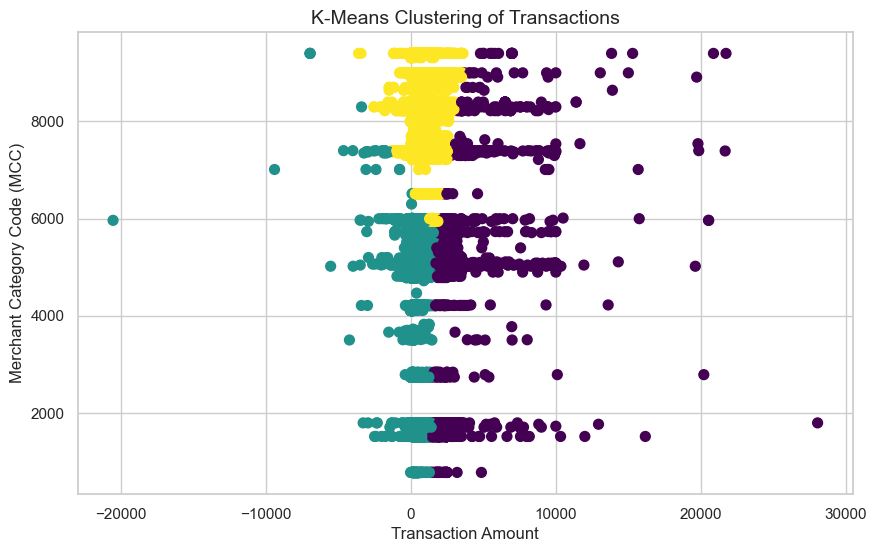

Cluster Sizes: kmeans_cluster
1    13456
2    10986
0     2795
Name: count, dtype: int64


In [138]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('DATASET/merged_data.csv')

# Select numerical features for clustering (transaction amount, MCC)
numerical_columns = ['transaction amount', 'mcc']
data_scaled = StandardScaler().fit_transform(data[numerical_columns])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can tune the number of clusters
data['kmeans_cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['transaction amount'], data['mcc'], c=data['kmeans_cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering of Transactions', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Merchant Category Code (MCC)', fontsize=12)
plt.show()

# Checking the size of each cluster
cluster_sizes = data['kmeans_cluster'].value_counts()
print("Cluster Sizes:", cluster_sizes)


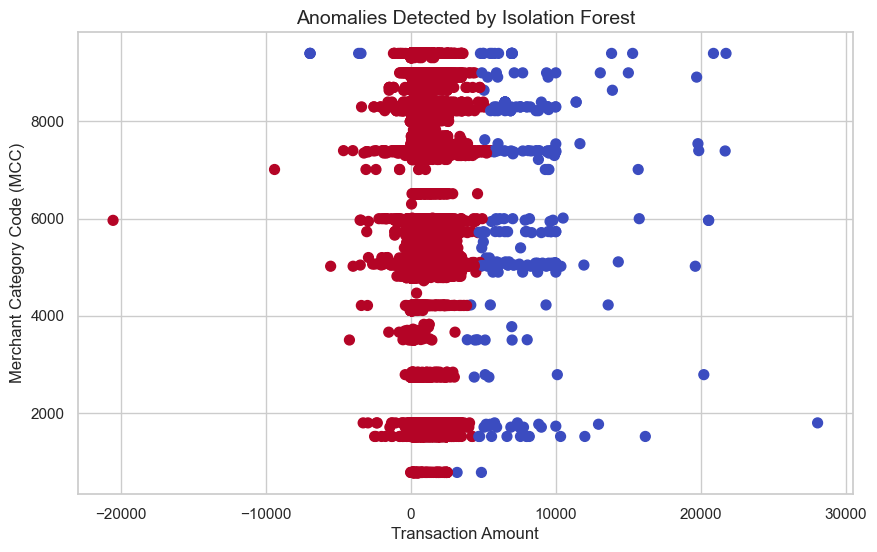

Anomaly Counts: anomaly
 1    26964
-1      273
Name: count, dtype: int64


In [142]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('DATASET/merged_data.csv')

# Select numerical features for anomaly detection (transaction amount, MCC)
numerical_columns = ['transaction amount', 'mcc']
data_scaled = StandardScaler().fit_transform(data[numerical_columns])

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # contamination=0.01 means we expect 1% anomalies
data['anomaly'] = iso_forest.fit_predict(data_scaled)

# Visualize the anomalies detected by Isolation Forest
plt.figure(figsize=(10, 6))
plt.scatter(data['transaction amount'], data['mcc'], c=data['anomaly'], cmap='coolwarm', s=50)
plt.title('Anomalies Detected by Isolation Forest', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Merchant Category Code (MCC)', fontsize=12)
plt.show()

# Check how many anomalies were detected
anomaly_counts = data['anomaly'].value_counts()
print("Anomaly Counts:", anomaly_counts)


Epoch 1/30


/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0108 - val_loss: 0.0010
Epoch 2/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 4.8912e-04 - val_loss: 0.0012
Epoch 3/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 5.3683e-04 - val_loss: 0.0010
Epoch 4/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 5.8234e-04 - val_loss: 0.0010
Epoch 5/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 5.3661e-04 - val_loss: 9.9431e-04
Epoch 6/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 5.4543e-04 - val_loss: 9.9396e-04
Epoch 7/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 5.2928e-04 - val_loss: 9.9938e-04
Epoch 8/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 5.3044e-04 - val_loss: 9.8890e-04
Epoch 9/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 5.0396e-04 - val_loss: 0.0010
Epoch 10/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 5.2007e-04 - val_loss: 9.9573e-04
Epoch 11/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 5.2319e-04 - val_loss:

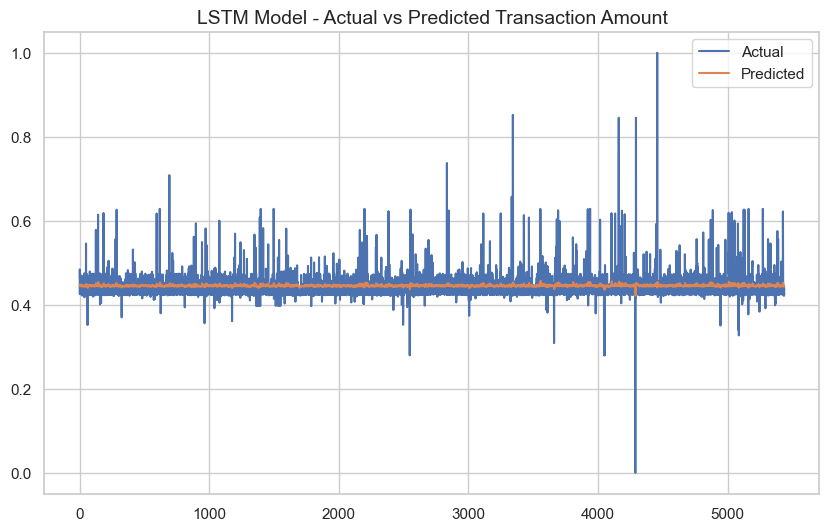

In [146]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('DATASET/merged_data.csv')

# Preprocessing: Convert transaction date to datetime
data['transaction date'] = pd.to_datetime(data['transaction date'])
data = data.sort_values('transaction date')

# Min-Max scaling of transaction amount
scaler = MinMaxScaler(feature_range=(0, 1))
data['scaled_amount'] = scaler.fit_transform(data[['transaction amount']])

# Create sequences for LSTM (use the last 50 transactions to predict the next one)
sequence_length = 50
X = []
y = []

# Create sequences for LSTM
for i in range(sequence_length, len(data)):
    X.append(data['scaled_amount'].iloc[i-sequence_length:i].values)
    y.append(data['scaled_amount'].iloc[i])

X = np.array(X)
y = np.array(y)

# Reshaping X for LSTM: [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and testing datasets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
predictions = model.predict(X_test)

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Model - Actual vs Predicted Transaction Amount', fontsize=14)
plt.legend()
plt.show()
